# Final Project
## Name: Accidents Severity Analysis and Prediction

Project Type (Analysis)  DSC 478
Team Members: Di Han, Wanshu Wang

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import folium
from folium import plugins
from folium.plugins import HeatMap
from wordcloud import WordCloud

In [2]:
# Read the input file
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"," ",'NaN']
df = pd.read_csv("//Users/wanshuwang/Documents/CSDS/DS/DSC478/FinalProject/US_Accidents_Dec20_updated.csv",na_values = missing_value_formats)
# Look at the shape of the data frame
df.shape

(1516064, 47)

In [3]:
sampleData = df[:200,:]
sampleData.to_csv("sample.csv")

TypeError: '(slice(None, 200, None), slice(None, None, None))' is an invalid key

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [92]:
df.isna().values.sum()

2427878

In [93]:
# check if has duplicated data
df["ID"].duplicated().any()

False

In [94]:
# print first 10 objects
df.head(10)

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08      40.11   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20      39.87   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39      39.10   
3  A-2716603         2  2016-02-08 06:15:39  2016-02-08 12:15:39      39.10   
4  A-2716604         2  2016-02-08 06:51:45  2016-02-08 12:51:45      41.06   
5  A-2716605         3  2016-02-08 07:53:43  2016-02-08 13:53:43      39.17   
6  A-2716606         2  2016-02-08 08:16:57  2016-02-08 14:16:57      39.06   
7  A-2716607         2  2016-02-08 08:16:57  2016-02-08 14:16:57      39.07   
8  A-2716608         2  2016-02-08 08:15:41  2016-02-08 14:15:41      39.78   
9  A-2716609         2  2016-02-08 11:51:46  2016-02-08 17:51:46      41.38   

   Start_Lng  End_Lat  End_Lng  Distance(mi)  \
0     -83.09    40.11   -83.03          3.23   
1     -84.06    39.87   -84.05          0.75   
2     -84.52    39.10   -84.52          0.06   
3     -84.52    39.10   -84.52          0.22   
4     -81.54    41.06   -81.54          0.12   
5     -84.49    39.17   -84.50          0.50   
6     -84.03    39.07   -84.06          1.43   
7     -84.06    39.06   -84.03          1.42   
8     -84.19    39.77   -84.19          0.23   
9     -81.82    41.37   -81.82          0.52   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
4                    At Dart Ave/Exit 21 - Accident.  ...       False   False   
5                 At Mitchell Ave/Exit 6 - Accident.  ...       False   False   
6                       At Dela Palma Rd - Accident.  ...       False   False   
7                       At Dela Palma Rd - Accident.  ...       False   False   
8                        At OH-4/Exit 54 - Accident.  ...       False   False   
9                  At Bagley Rd/Exit 235 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False          Night   
5  False           False          False        False            Day   
6  False           False           True        False            Day   
7  False           False          False        False            Day   
8  False           False          False        False            Day   
9  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night             Night                   Day  
4          Night               Day                   Day  
5            Day               Day                   Day  
6            Day               Day                   Day  
7            Day               Day                   Day  
8            Day               Day                   Day  
9            Day               Day                   Day  

[10 rows x 47 columns]

In [95]:
# print feature names
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [96]:
# print the type of the features
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

# Data Pre-processing - missing data

In [97]:
missing_percentage = df.isna().sum().sort_values(ascending=False) / len(df)*100
missing_percentage
# the features we deleted : Number( street number 69%), 

Number                  69.00
Precipitation(in)       33.68
Wind_Chill(F)           29.64
Wind_Speed(mph)          8.50
Humidity(%)              3.00
Visibility(mi)           2.92
Weather_Condition        2.90
Temperature(F)           2.84
Wind_Direction           2.76
Pressure(in)             2.39
Weather_Timestamp        2.00
Airport_Code             0.28
Timezone                 0.15
Zipcode                  0.06
Sunrise_Sunset           0.01
Civil_Twilight           0.01
Nautical_Twilight        0.01
Astronomical_Twilight    0.01
City                     0.01
Country                  0.00
Give_Way                 0.00
Start_Time               0.00
End_Time                 0.00
Start_Lat                0.00
Turning_Loop             0.00
Traffic_Signal           0.00
Traffic_Calming          0.00
Stop                     0.00
Station                  0.00
Roundabout               0.00
Railway                  0.00
No_Exit                  0.00
Junction                 0.00
Crossing  

<AxesSubplot:>

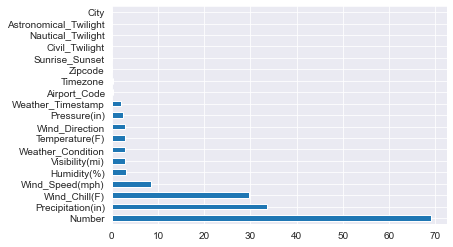

In [98]:
missing_percentage[missing_percentage != 0].plot(kind='barh')

The followings are all the columns which have missing data:
Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
City                      0.005475

We deleted Number, because it has address information, we have many features including address information, like zipcode, street, etc. We will drop more this kind of feature to avoid the redundancy. 

For Precipitation, we don't want to simply fill in with mean/median value because it is related to the humidity, visibility and otherweather condition, pressure and many other weather related features. Considering this point, we dropped this feature, because we have many other weather related features which will provide this information. 

Similarly, we deleted the Wind_Chill(F).

We fill Zipcode with the value which has same pair of City and State pair.

In [99]:
#fill city and zipcode
#df['Zipcode']  = np.where(df["Zipcode"] == X) and np.where(df["CITY"] == Y) and np.where(df["STATE"] == Z)
df['Zipcode'] = df['Zipcode'].fillna(df.groupby(['City','State'])['Zipcode'].transform("first"))



In [100]:
df['Zipcode'].isna().values.sum()

740

In [101]:
df['City'].isna().values.sum()

83

In [102]:
#fill city and zipcode
#df['Zipcode']  = np.where(df["Zipcode"] == X) and np.where(df["CITY"] == Y) and np.where(df["STATE"] == Z)
df['City'] = df['City'].fillna(df.groupby(['Zipcode'])['City'].transform("first"))

In [103]:
df['City'].isna().values.sum() # stil has 1, means it has not zipcode info either. 

1

In [104]:
#fill it with the most frequent in the state
df['City'] = df['City'].fillna(df.groupby(['State'])['City'].transform("first"))
df['City'].isna().values.sum()  #

0

In [105]:
df['Zipcode'] = df['Zipcode'].fillna(df.groupby(['State'])['Zipcode'].transform("first"))
df['Zipcode'].isna().values.sum()

0

In [106]:
#####   zipcode, city filling na is done   #######

In [107]:
# process start_time and end_time features: transfer them into datatime type. 

In [108]:
df.Start_Time.head(10)

0    2016-02-08 00:37:08
1    2016-02-08 05:56:20
2    2016-02-08 06:15:39
3    2016-02-08 06:15:39
4    2016-02-08 06:51:45
5    2016-02-08 07:53:43
6    2016-02-08 08:16:57
7    2016-02-08 08:16:57
8    2016-02-08 08:15:41
9    2016-02-08 11:51:46
Name: Start_Time, dtype: object

In [109]:
# split start_time
df.End_Time.isna().values.sum()

0

In [110]:
df.Start_Time.isna().values.sum()

0

In [111]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time']= pd.to_datetime(df['End_Time'])

In [112]:
df["month"] = df['Start_Time'].dt.month

In [113]:
# caculate the hours of the accidents by end_time - start_time
#df.Hours = df.End_Time - df.Start_Time 

For these features, Wind_Speed(mph), Humidity(%), Visibility(mi) , we fill them with the mean value of the month in a certain city or state. 

In [114]:
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df.groupby(['month','City'])['Wind_Speed(mph)'].transform('mean'))
df['Wind_Speed(mph)'].isna().values.sum()

10503

In [115]:
# for those missing values not match "month","city" group. fill them with the mean value by month, state group
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df.groupby(['month','State'])['Wind_Speed(mph)'].transform('mean'))
df['Wind_Speed(mph)'].isna().values.sum()

0

In [116]:
# similarly to Humidity(%), Visibility(mi) 

In [117]:
df['Humidity(%)'] = df['Humidity(%)'].fillna(df.groupby(['month','City'])['Humidity(%)'].transform('mean'))
df['Humidity(%)'].isna().values.sum()

4238

In [118]:
df['Humidity(%)'] = df['Humidity(%)'].fillna(df.groupby(['month','State'])['Humidity(%)'].transform('mean'))
df['Humidity(%)'].isna().values.sum()

0

In [119]:
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df.groupby(['month','City'])['Visibility(mi)'].transform('mean'))
df['Visibility(mi)'].isna().values.sum()

7597

In [120]:
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df.groupby(['month','State'])['Visibility(mi)'].transform('mean'))
df['Visibility(mi)'].isna().values.sum()

0

We will drop these two columns. 
Weather_Timestamp         1.996222
Airport_Code              0.280199

In [121]:
#Similarly to process 
#Temperature(F)            2.838469
#Wind_Direction            2.760965
#Pressure(in)              2.392643

In [122]:
df['Temperature(F)'] = df['Temperature(F)'].fillna(df.groupby(['month','City'])['Temperature(F)'].transform('mean'))
df['Temperature(F)'].isna().values.sum()

4141

In [123]:
df['Temperature(F)'] = df['Temperature(F)'].fillna(df.groupby(['month','State'])['Temperature(F)'].transform('mean'))
df['Temperature(F)'].isna().values.sum()

0

In [124]:
df['Pressure(in)'].isna().values.sum()

36274

In [125]:
df['Pressure(in)'] = df['Pressure(in)'].fillna(df.groupby(['month','City'])['Pressure(in)'].transform('mean'))
df['Pressure(in)'].isna().values.sum()

3825

In [126]:
df['Pressure(in)'] = df['Pressure(in)'].fillna(df.groupby(['month','State'])['Pressure(in)'].transform('mean'))
df['Pressure(in)'].isna().values.sum()

0

In [127]:
df['Wind_Direction'].isna().values.sum()

41858

we analyze the weather conditions, we can see that there are lots of them, so it's better to reduce the number of unique conditions.

In [128]:
#To do so, we are going to replace them with a more generic description:

In [129]:
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

print(df["Weather_Condition"].describe())

count     1471654
unique         11
top         Clear
freq       645475
Name: Weather_Condition, dtype: object


In [130]:
df["Weather_Condition"].unique()

array(['Rain', 'Cloudy', 'Snow', nan, 'Clear', 'Fog', 'Thunderstorm', 'Smoke', 'Windy', 'Hail',
       'Sand', 'Tornado'], dtype=object)

In [131]:
df['Wind_Direction'].isna().values.sum()

41858

In [132]:
df['Wind_Direction'] = df['Wind_Direction'].fillna(df.groupby(['month','City'])['Wind_Direction'].transform('first'))
df['Wind_Direction'].isna().values.sum()

3981

In [133]:
df['Wind_Direction'] = df['Wind_Direction'].fillna(df.groupby(['month','State'])['Wind_Direction'].transform('first'))
df['Wind_Direction'].isna().values.sum()

0

In [134]:
# Weather_Condition         2.902714

In [135]:
df['Weather_Condition'].isna().values.sum()

44410

In [136]:
df['Weather_Condition'] = df['Weather_Condition'].fillna(df.groupby(['month','City'])['Weather_Condition'].transform('first'))
df['Weather_Condition'].isna().values.sum()

7673

In [137]:
df['Weather_Condition'] = df['Weather_Condition'].fillna(df.groupby(['month','State'])['Weather_Condition'].transform('first'))
df['Weather_Condition'].isna().values.sum()

0

In [138]:
# timezone fill by same state
df['Timezone'].isna().values.sum()

2302

In [139]:
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].fillna(df.groupby(['month','City'])['Sunrise_Sunset'].transform('first'))
df['Sunrise_Sunset'].isna().values.sum()

0

We drop timezone because it address, info location, 
Also Drop Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight.

In [88]:
df_cleaned = df.drop(columns =["ID","Number","Precipitation(in)","Wind_Chill(F)","Weather_Timestamp","Airport_Code","Timezone","Astronomical_Twilight","Nautical_Twilight","Civil_Twilight"]) #without missing data

NameError: name 'df' is not defined

In [160]:
df_cleaned = df_cleaned.drop(columns="month")

In [161]:
df_cleaned.shape

(1516064, 37)

In [162]:
df_cleaned.isna().values.sum()  # no missing values

0

In [163]:
df_cleaned.columns


Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset'],
      dtype='object')

In [164]:
#write in file 
df_cleaned.to_csv('data_cleaned.csv',index=True, index_label=None) 

# Data Exploratory

In [ ]:
# Analyzing in Location, weather information

In [87]:
# location: State
states = df_cleaned.State.unique()
len(states)

NameError: name 'df_cleaned' is not defined

<AxesSubplot:title={'center':'Number of Accidents by Stateb'}, xlabel='State', ylabel='count'>

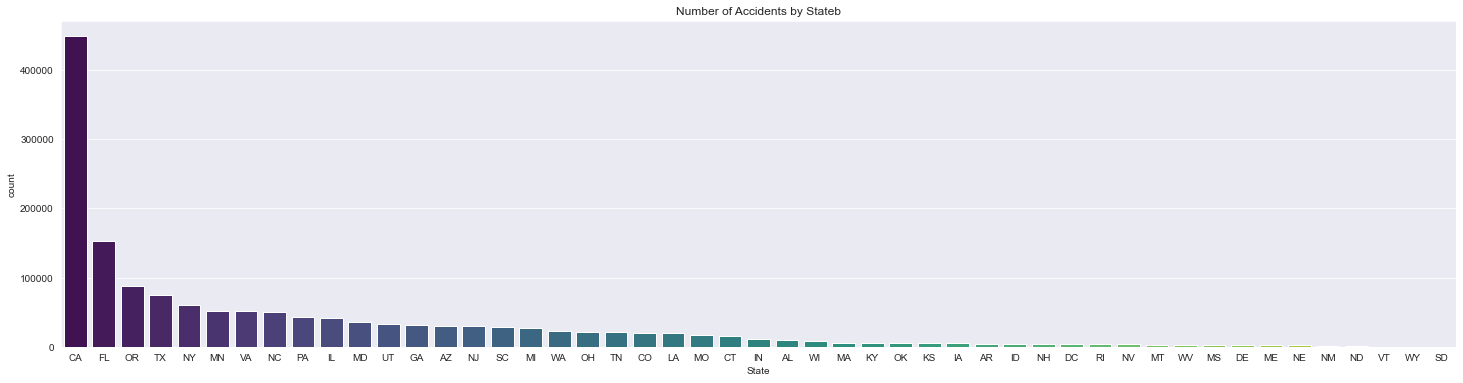

In [166]:
by_state = df_cleaned.State.value_counts()
fig, ax = plt.subplots(figsize = (25,6))
state_plot = sns.countplot(x=df.State, data=df_cleaned, order=df_cleaned.State.value_counts().iloc[:49].index, orient = 'v', palette = "viridis")
state_plot.set_title("Number of Accidents by Stateb")
state_plot

California(CA) is the most populated state, followed by Texas(TX) and Florida(FL), they are also in the top 5 of the states with the higher number of accidents.
Oregon (OR) is the 3rd state with the most number of accidents and the 27th most populated state in the US.

In [167]:
# By city
# show top 30 cities in the number of accidents
by_city = df_cleaned.City.value_counts()
by_city_top = by_city.head(30)
by_city_top

Los Angeles       39984
Miami             36233
Charlotte         22203
Houston           20843
Dallas            19497
Sacramento        18431
Orlando           16169
Portland          14805
San Diego         14090
Minneapolis       12653
Atlanta           11854
Chicago           11507
Saint Paul        10084
Phoenix            9934
Raleigh            9516
San Jose           9362
Richmond           8472
Nashville          8381
Riverside          8201
Jacksonville       7815
Salt Lake City     7737
Kansas City        7500
Baton Rouge        7085
Austin             7038
Oakland            6978
Tucson             6908
Denver             6803
San Bernardino     6653
Seattle            6531
New Orleans        6479
Name: City, dtype: int64

<AxesSubplot:title={'center':'Number of Accidents by City - Top 30 cities'}, xlabel='City', ylabel='count'>

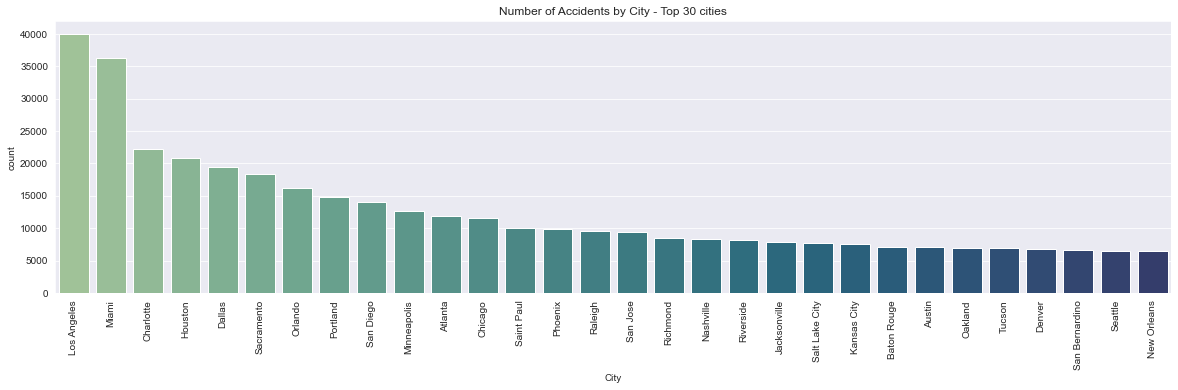

In [168]:
fig, ax = plt.subplots(figsize = (20,5))
city_plot = sns.countplot(x=df_cleaned.City, data=df_cleaned, order=df_cleaned.City.value_counts().iloc[:30].index, orient = 'v', palette = "crest")
city_plot.set_title("Number of Accidents by City - Top 30 cities")
city_plot.set_xticklabels(city_plot.get_xticklabels(), rotation=90)
city_plot

<AxesSubplot:title={'center':'Number of Accidents by City - Top 10 cities'}, xlabel='City', ylabel='count'>

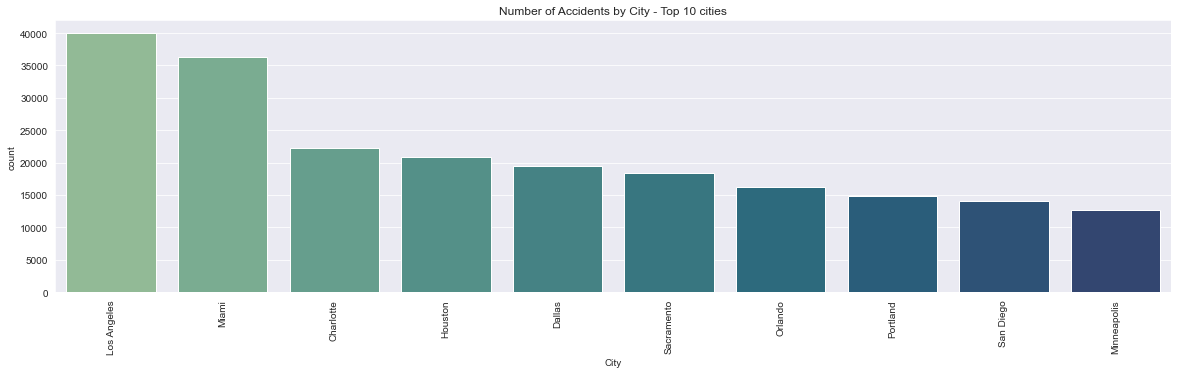

In [169]:
fig, ax = plt.subplots(figsize = (20,5))
city_plot = sns.countplot(x=df_cleaned.City, data=df_cleaned, order=df_cleaned.City.value_counts().iloc[:10].index, orient = 'v', palette = "crest")
city_plot.set_title("Number of Accidents by City - Top 10 cities")
city_plot.set_xticklabels(city_plot.get_xticklabels(), rotation=90)
city_plot

In [170]:
# Number of the accidents distribution on a map

In [172]:
map = folium.Map(location = [40, -102], zoom_start = 4)
folium.plugins.HeatMap(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)), scale_radius = True, radius = 13).add_to(map)
map

In [173]:
# analysis on weather condition
df_temp = df_cleaned['Temperature(F)'].value_counts()
df_temp[:20]

59.0    32425
63.0    31612
68.0    30926
57.0    30890
64.0    30789
        ...  
37.4     1570
35.6     1562
33.8     1561
91.4     1432
20.0     1412
Name: Temperature(F), Length: 138, dtype: int64

In [174]:
"""fig, ax = plt.subplots(figsize = (20,5)) #
temp_plot = sns.countplot(x=df_cleaned['Temperature(F)'], data=df_cleaned, orient = 'v', palette = "crest")
temp_plot.set_title("Number of Accidents by Temperature")
temp_plot.set_xticklabels(temp_plot.get_xticklabels())
temp_plot"""

'fig, ax = plt.subplots(figsize = (20,5)) #\ntemp_plot = sns.countplot(x=df_cleaned[\'Temperature(F)\'], data=df_cleaned, orient = \'v\', palette = "crest")\ntemp_plot.set_title("Number of Accidents by Temperature")\ntemp_plot.set_xticklabels(temp_plot.get_xticklabels())\ntemp_plot'

<AxesSubplot:title={'center':'Number of Accidents by Temperature'}, xlabel='Temperature(F)', ylabel='count'>

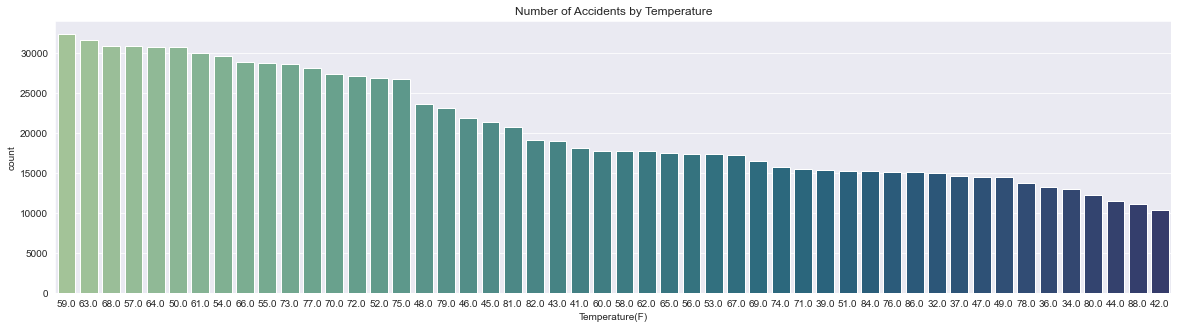

In [175]:
fig, ax = plt.subplots(figsize = (20,5)) #
temp_plot = sns.countplot(x=df['Temperature(F)'], data=df_cleaned, order=df_cleaned['Temperature(F)'].value_counts().iloc[:50].index,orient = 'v', palette = "crest")
temp_plot.set_title("Number of Accidents by Temperature")
temp_plot.set_xticklabels(temp_plot.get_xticklabels())
temp_plot

Interestingly, most accidents happen on the days with a Fairweather, follow by days Mostly Cloudy.
Most accidents happen on days with temperatures between 50°F and 75°F (10°C and 23°C)

In [86]:
counts = df_cleaned["Weather_Condition"].value_counts()[:15]
plt.figure(figsize=(20, 8))
plt.title("Histogram distribution of the top 15 weather conditions")
sns.barplot(counts.index, counts.values)
plt.xlabel("Weather Condition")
plt.ylabel("Value")
plt.show()

NameError: name 'df_cleaned' is not defined

We can see the top 5 weather conditions are kindly good. None of them are extreme weather condition, like rain, snow or fog

In [177]:
# persentages of the four severity levels of accidents
df_severity = df_cleaned.Severity.value_counts()/ len(df.Severity)*100
df_severity

2    79.969051
3    10.623034
4     7.549286
1     1.858629
Name: Severity, dtype: float64

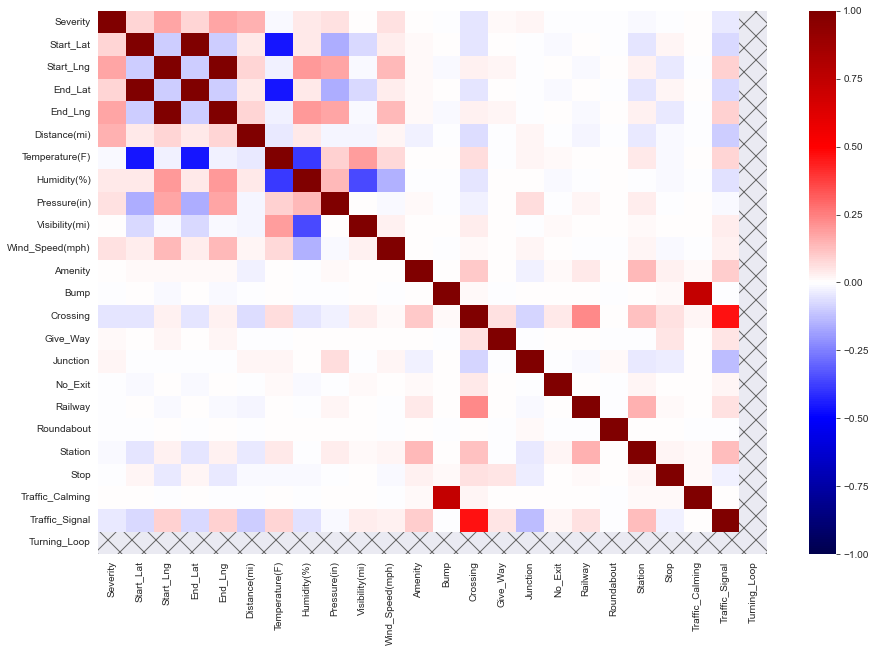

In [178]:
# correlation 
corr_matrix = df_cleaned.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.show()

From the matrix we can see that the start and end GPS coordinates of the accidents are highly correlated.

In fact, from the medium distance shown before, the end of the accident is usually close to the start, so we can consider just one of them for the machine learning models.

Moreover, the wind chill (temperature) is directly proportional to the temperature, so we can also drop one of them.

We can also see that the presence of a traffic signal is slightly correlated to the severity of an accident meaning that maybe traffic lights can help the traffic flow when an accident occurs.
From the matrix we can also note that we couldn't compute the covariance with Turning_Loop, and that's because it's always False.

# Handle unbalanced data

In [454]:
df_cleaned = pd.read_csv("//Users/wanshuwang/Documents/CSDS/DS/DSC478/FinalProject/data_cleaned.csv",index_col=None)




In [455]:
severity_counts = df_cleaned["Severity"].value_counts()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


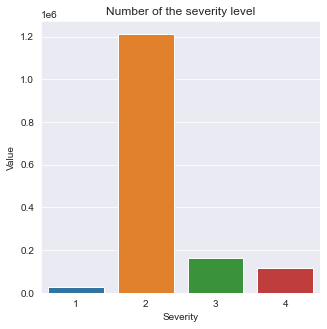

In [457]:
plt.figure(figsize=(5,5))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.title("Number of the severity level")
plt.show()

# Synthetic Minority Oversampling Technique

Due to the imbalance of this dataset mentioned in section 2.1, we used Synthetic Minority Oversampling Technique to balance the dataset. We used imblearn package and SMOTE method. The following is balanced for the four levels. There are 4849528 observations after SMOTE, compared to 1516064 as before. 

## Data Preparation


In [ ]:
# Drop unnecessary columns

In [196]:
df_cleaned.isna().values.sum()

0

In [198]:
df_updated = df_cleaned
#df_updated.Turning_Loop

In [199]:
df_updated = df_updated.drop(columns = ["Turning_Loop"])
# because it has only Flase for all data

In [200]:
# only keep zipcode for address info
df_updated = df_updated.drop(columns = ["Street","Side","City","County","State",'Country'])   


In [201]:
# only keep Start_Lat, Start_lng
df_updated = df_updated.drop(columns = ["End_Lng","End_Lat"])

In [202]:
# only keep Start_Time
# wont research description this time, timezone(address info)
# airport_code, 
df_updated = df_updated.drop(columns = ["End_Time","Description"])

In [203]:
# Remap to integers for bool type features: 

In [204]:
df_updated['Amenity'] = [0 if x == 'False' else 1 for x in df_updated['Amenity']]

In [205]:
df_updated['Bump'] = [0 if x == 'False' else 1 for x in df_updated['Bump']]

In [206]:
df_updated['Crossing'] = [0 if x == 'False' else 1 for x in df_updated['Crossing']]

In [207]:
df_updated['Give_Way'] = [0 if x == 'False' else 1 for x in df_updated['Give_Way']]

In [208]:
df_updated['Junction'] = [0 if x == 'False' else 1 for x in df_updated['Junction']]

In [209]:
df_updated['No_Exit'] = [0 if x == 'False' else 1 for x in df_updated['No_Exit']]

In [210]:
df_updated['Railway'] = [0 if x == 'False' else 1 for x in df_updated['Railway']]

In [211]:
df_updated['Roundabout'] = [0 if x == 'False' else 1 for x in df_updated['Roundabout']]

In [212]:
df_updated['Station'] = [0 if x == 'False' else 1 for x in df_updated['Station']]

In [213]:
df_updated['Stop'] = [0 if x == 'False' else 1 for x in df_updated['Stop']]

In [214]:
df_updated['Traffic_Calming'] = [0 if x == 'False' else 1 for x in df_updated['Traffic_Calming']]
df_updated['Traffic_Signal'] = [0 if x == 'False' else 1 for x in df_updated['Traffic_Signal']]

In [215]:
# transform datatime features

In [216]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 26 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Severity           1516064 non-null  int64  
 1   Start_Time         1516064 non-null  object 
 2   Start_Lat          1516064 non-null  float64
 3   Start_Lng          1516064 non-null  float64
 4   Distance(mi)       1516064 non-null  float64
 5   Zipcode            1516064 non-null  object 
 6   Temperature(F)     1516064 non-null  float64
 7   Humidity(%)        1516064 non-null  float64
 8   Pressure(in)       1516064 non-null  float64
 9   Visibility(mi)     1516064 non-null  float64
 10  Wind_Direction     1516064 non-null  object 
 11  Wind_Speed(mph)    1516064 non-null  float64
 12  Weather_Condition  1516064 non-null  object 
 13  Amenity            1516064 non-null  int64  
 14  Bump               1516064 non-null  int64  
 15  Crossing           1516064 non-n

In [217]:
df_updated['Start_Time'] = pd.to_datetime(df_updated['Start_Time'])

df_updated['Month'] = df_updated['Start_Time'].dt.month
df_updated['Year'] = df_updated['Start_Time'].dt.year
df_updated['Hour'] = df_updated['Start_Time'].dt.hour
df_updated['Date'] = df_updated['Start_Time'].dt.day
df_updated['Dayofweek'] = df_updated['Start_Time'].dt.dayofweek

In [218]:
df_updated = df_updated.drop(columns = "Start_Time")

In [219]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Severity           1516064 non-null  int64  
 1   Start_Lat          1516064 non-null  float64
 2   Start_Lng          1516064 non-null  float64
 3   Distance(mi)       1516064 non-null  float64
 4   Zipcode            1516064 non-null  object 
 5   Temperature(F)     1516064 non-null  float64
 6   Humidity(%)        1516064 non-null  float64
 7   Pressure(in)       1516064 non-null  float64
 8   Visibility(mi)     1516064 non-null  float64
 9   Wind_Direction     1516064 non-null  object 
 10  Wind_Speed(mph)    1516064 non-null  float64
 11  Weather_Condition  1516064 non-null  object 
 12  Amenity            1516064 non-null  int64  
 13  Bump               1516064 non-null  int64  
 14  Crossing           1516064 non-null  int64  
 15  Give_Way           1516064 non-n

In [220]:
# Create dummy variables

In [221]:
df_updated.Sunrise_Sunset.describe()

count     1516064
unique          2
top           Day
freq       909893
Name: Sunrise_Sunset, dtype: object

In [222]:
df_updated["Sunrise_Sunset"] = pd.get_dummies(df_updated['Sunrise_Sunset'], prefix='Sunrise_Sunset_type', drop_first=True)

In [223]:
df_updated.Sunrise_Sunset

0          1
1          1
2          1
3          1
4          1
          ..
1516059    0
1516060    0
1516061    0
1516062    0
1516063    0
Name: Sunrise_Sunset, Length: 1516064, dtype: uint8

In [224]:
# there are 24 unique for Wind_Direction, we will reduce the number of types

In [225]:
df_updated.Wind_Direction.describe()

count     1516064
unique         24
top          CALM
freq       204866
Name: Wind_Direction, dtype: object

In [226]:
df_updated.Wind_Direction.value_counts()

CALM        204866
Calm         84684
WNW          79371
NW           77648
W            72439
SSW          71459
NNW          69924
WSW          69808
S            68009
SW           67795
SSE          66856
SE           55982
N            54138
E            52718
ENE          52535
ESE          52434
NE           49804
NNE          47728
South        42663
West         42578
North        42059
VAR          39927
East         26298
Variable     24341
Name: Wind_Direction, dtype: int64

In [227]:
df_updated.loc[df_updated["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df_updated.loc[df_updated["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df_updated.loc[df_updated["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df_updated.loc[df_updated["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df_updated.loc[df_updated["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df_updated.loc[df_updated["Wind_Direction"] == "West", "Wind_Direction"] = "W"

In [468]:
df_updated.Wind_Direction.value_counts()

Calm        289550
W           115017
S           110672
N            96197
WNW          79371
E            79016
NW           77648
SSW          71459
NNW          69924
WSW          69808
SW           67795
SSE          66856
Variable     64268
SE           55982
ENE          52535
ESE          52434
NE           49804
NNE          47728
Name: Wind_Direction, dtype: int64

In [469]:
df_updated.Wind_Direction.describe()

count     1516064
unique         18
top          Calm
freq       289550
Name: Wind_Direction, dtype: object

In [230]:
# weather condition

In [231]:
df_updated.loc[df_updated["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df_updated.loc[df_updated["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df_updated.loc[df_updated["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df_updated.loc[df_updated["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df_updated.loc[df_updated["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df_updated.loc[df_updated["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df_updated.loc[df_updated["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df_updated.loc[df_updated["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df_updated.loc[df_updated["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df_updated.loc[df_updated["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df_updated.loc[df_updated["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

print(df_updated["Weather_Condition"].describe())

count     1516064
unique         11
top         Clear
freq       664841
Name: Weather_Condition, dtype: object


In [232]:

df_updated["Weather_Condition"].unique()

array(['Rain', 'Cloudy', 'Snow', 'Clear', 'Fog', 'Thunderstorm', 'Smoke',
       'Windy', 'Hail', 'Sand', 'Tornado'], dtype=object)

In [233]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Severity           1516064 non-null  int64  
 1   Start_Lat          1516064 non-null  float64
 2   Start_Lng          1516064 non-null  float64
 3   Distance(mi)       1516064 non-null  float64
 4   Zipcode            1516064 non-null  object 
 5   Temperature(F)     1516064 non-null  float64
 6   Humidity(%)        1516064 non-null  float64
 7   Pressure(in)       1516064 non-null  float64
 8   Visibility(mi)     1516064 non-null  float64
 9   Wind_Direction     1516064 non-null  object 
 10  Wind_Speed(mph)    1516064 non-null  float64
 11  Weather_Condition  1516064 non-null  object 
 12  Amenity            1516064 non-null  int64  
 13  Bump               1516064 non-null  int64  
 14  Crossing           1516064 non-null  int64  
 15  Give_Way           1516064 non-n

In [234]:
df_windBin = pd.get_dummies(df_updated["Wind_Direction"], prefix="Wind_Direction")
df_windBin.head(10)
df_windBin.shape

(1516064, 18)

In [235]:
df_wBin = pd.get_dummies(df_updated["Weather_Condition"], prefix="Weather_Condition")
df_wBin.head(10)
df_wBin.shape

(1516064, 11)

In [303]:

df_dummy = df_updated.drop(columns=["Weather_Condition","Wind_Direction","Zipcode","Start_Lat","Start_Lng"])
df_dummy.shape

(1516064, 25)

In [304]:
df_dummy.head(10)

Severity  Distance(mi)  Temperature(F)  Humidity(%)  Pressure(in)  \
0         3         3.230            42.1         58.0         29.76   
1         2         0.747            36.9         91.0         29.68   
2         2         0.055            36.0         97.0         29.70   
3         2         0.219            36.0         97.0         29.70   
4         2         0.123            39.0         55.0         29.65   
5         3         0.500            37.0         93.0         29.69   
6         2         1.427            35.6        100.0         29.66   
7         2         1.423            35.6        100.0         29.66   
8         2         0.227            33.8        100.0         29.63   
9         2         0.521            33.1         92.0         29.63   

   Visibility(mi)  Wind_Speed(mph)  Amenity  Bump  Crossing  ...  Station  \
0            10.0        10.400000        1     1         1  ...        1   
1            10.0         9.863415        1     1         1  ...        1   
2            10.0         9.166000        1     1         1  ...        1   
3            10.0         9.166000        1     1         1  ...        1   
4            10.0        10.397143        1     1         1  ...        1   
5            10.0        10.400000        1     1         1  ...        1   
6            10.0         8.100000        1     1         1  ...        1   
7            10.0         8.100000        1     1         1  ...        1   
8             3.0         2.300000        1     1         1  ...        1   
9             0.5         3.500000        1     1         1  ...        1   

   Stop  Traffic_Calming  Traffic_Signal  Sunrise_Sunset  Month  Year  Hour  \
0     1                1               1               1      2  2016     0   
1     1                1               1               1      2  2016     5   
2     1                1               1               1      2  2016     6   
3     1                1               1               1      2  2016     6   
4     1                1               1               1      2  2016     6   
5     1                1               1               0      2  2016     7   
6     1                1               1               0      2  2016     8   
7     1                1               1               0      2  2016     8   
8     1                1               1               0      2  2016     8   
9     1                1               1               0      2  2016    11   

   Date  Dayofweek  
0     8          0  
1     8          0  
2     8          0  
3     8          0  
4     8          0  
5     8          0  
6     8          0  
7     8          0  
8     8          0  
9     8          0  

[10 rows x 25 columns]

In [470]:
df_dummy = pd.concat([df_dummy,df_windBin, df_wBin],axis=1)
df_dummy.head(10)

Severity  Distance(mi)  Temperature(F)  Humidity(%)  Pressure(in)  \
0         3          3.23           42.10        58.00         29.76   
1         2          0.75           36.90        91.00         29.68   
2         2          0.06           36.00        97.00         29.70   
3         2          0.22           36.00        97.00         29.70   
4         2          0.12           39.00        55.00         29.65   
5         3          0.50           37.00        93.00         29.69   
6         2          1.43           35.60       100.00         29.66   
7         2          1.42           35.60       100.00         29.66   
8         2          0.23           33.80       100.00         29.63   
9         2          0.52           33.10        92.00         29.63   

   Visibility(mi)  Wind_Speed(mph)  Amenity  Bump  Crossing  ...  \
0           10.00            10.40        1     1         1  ...   
1           10.00             9.86        1     1         1  ...   
2           10.00             9.17        1     1         1  ...   
3           10.00             9.17        1     1         1  ...   
4           10.00            10.40        1     1         1  ...   
5           10.00            10.40        1     1         1  ...   
6           10.00             8.10        1     1         1  ...   
7           10.00             8.10        1     1         1  ...   
8            3.00             2.30        1     1         1  ...   
9            0.50             3.50        1     1         1  ...   

   Weather_Condition_Cloudy  Weather_Condition_Fog  Weather_Condition_Hail  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         1                      0                       0   
3                         1                      0                       0   
4                         1                      0                       0   
5                         0                      0                       0   
6                         1                      0                       0   
7                         1                      0                       0   
8                         1                      0                       0   
9                         0                      0                       0   

   Weather_Condition_Rain  Weather_Condition_Sand  Weather_Condition_Smoke  \
0                       1                       0                        0   
1                       1                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   
5                       1                       0                        0   
6                       0                       0                        0   
7                       0                       0                        0   
8                       0                       0                        0   
9                       0                       0                        0   

   Weather_Condition_Snow  Weather_Condition_Thunderstorm  \
0                       0                               0   
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   
5                       0                               0   
6                       0                               0   
7                       0                               0   
8                       0                               0   
9                       1                               0   

   Weather_Condition_Tornado  Weather_Condition_Windy  
0              

In [247]:

df_dummy.isna().values.sum()

0

In [461]:
#missing_percentage = df_dummy.isna().sum().sort_values(ascending=False) / len(df)*100
#missing_percentage

In [249]:
# check version number
import imblearn # pip install imblearn
from imblearn.over_sampling import SMOTE

In [471]:
from sklearn.preprocessing import MinMaxScaler
df_dummy_2 =df_dummy
df_dummy_2.head(10)

Severity  Distance(mi)  Temperature(F)  Humidity(%)  Pressure(in)  \
0         3          3.23           42.10        58.00         29.76   
1         2          0.75           36.90        91.00         29.68   
2         2          0.06           36.00        97.00         29.70   
3         2          0.22           36.00        97.00         29.70   
4         2          0.12           39.00        55.00         29.65   
5         3          0.50           37.00        93.00         29.69   
6         2          1.43           35.60       100.00         29.66   
7         2          1.42           35.60       100.00         29.66   
8         2          0.23           33.80       100.00         29.63   
9         2          0.52           33.10        92.00         29.63   

   Visibility(mi)  Wind_Speed(mph)  Amenity  Bump  Crossing  ...  \
0           10.00            10.40        1     1         1  ...   
1           10.00             9.86        1     1         1  ...   
2           10.00             9.17        1     1         1  ...   
3           10.00             9.17        1     1         1  ...   
4           10.00            10.40        1     1         1  ...   
5           10.00            10.40        1     1         1  ...   
6           10.00             8.10        1     1         1  ...   
7           10.00             8.10        1     1         1  ...   
8            3.00             2.30        1     1         1  ...   
9            0.50             3.50        1     1         1  ...   

   Weather_Condition_Cloudy  Weather_Condition_Fog  Weather_Condition_Hail  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         1                      0                       0   
3                         1                      0                       0   
4                         1                      0                       0   
5                         0                      0                       0   
6                         1                      0                       0   
7                         1                      0                       0   
8                         1                      0                       0   
9                         0                      0                       0   

   Weather_Condition_Rain  Weather_Condition_Sand  Weather_Condition_Smoke  \
0                       1                       0                        0   
1                       1                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   
5                       1                       0                        0   
6                       0                       0                        0   
7                       0                       0                        0   
8                       0                       0                        0   
9                       0                       0                        0   

   Weather_Condition_Snow  Weather_Condition_Thunderstorm  \
0                       0                               0   
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   
5                       0                               0   
6                       0                               0   
7                       0                               0   
8                       0                               0   
9                       1                               0   

   Weather_Condition_Tornado  Weather_Condition_Windy  
0              

In [472]:
df_dummy_2.to_csv("data_unbalanced.csv")

In [473]:
# transform the dataset
X = df_dummy_2.drop(columns =["Severity"]) 
X.shape

(1516064, 53)

In [474]:
X_array = X.to_numpy()
X_array

array([[ 3.23, 42.1 , 58.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.75, 36.9 , 91.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.06, 36.  , 97.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.56, 73.  , 64.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.77, 71.  , 81.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.54, 79.  , 47.  , ...,  0.  ,  0.  ,  0.  ]])

In [475]:
y = df_dummy_2["Severity"].to_numpy()

In [476]:
y

array([3, 2, 2, ..., 2, 2, 2])

In [477]:
#Normalization
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_norm = min_max_scaler.fit_transform(X_array)

In [478]:
X_norm.shape

(1516064, 53)

In [479]:
sm = SMOTE(random_state=42)

In [481]:
y.shape

(1516064,)

In [480]:
X_norm.shape

(1516064, 53)

In [482]:
X_sm, y_sm = sm.fit_resample(X_norm, y)

Shape of X before SMOTE: (1516064, 53)
Shape of X after SMOTE: (4849528, 53)

Balance of four severity levels (%):


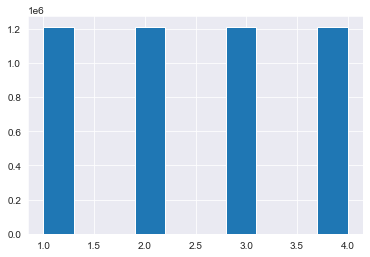

In [483]:
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of four severity levels (%):')
plt.hist(y_sm) # plotting by columns
plt.show()

In [484]:
newcolumns = df_dummy_2.columns[1:]
df_new = pd.DataFrame(X_sm,columns = newcolumns)


Severity
0               3
1               2
2               2
3               2
4               2
...           ...
4849523         4
4849524         4
4849525         4
4849526         4
4849527         4

[4849528 rows x 1 columns]

In [486]:
df_merged = pd.concat([df_new, y_df],axis = 1)
df_merged.shape

(4849528, 54)

In [487]:
df_merged.head(10)

Distance(mi)  Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
0          0.02            0.51         0.58          0.51            0.07   
1          0.00            0.48         0.91          0.51            0.07   
2          0.00            0.48         0.97          0.51            0.07   
3          0.00            0.48         0.97          0.51            0.07   
4          0.00            0.49         0.55          0.51            0.07   
5          0.00            0.49         0.93          0.51            0.07   
6          0.01            0.48         1.00          0.51            0.07   
7          0.01            0.48         1.00          0.51            0.07   
8          0.00            0.47         1.00          0.51            0.02   
9          0.00            0.47         0.92          0.51            0.00   

   Wind_Speed(mph)  Amenity  Bump  Crossing  Give_Way  ...  \
0             0.01     0.00  0.00      0.00      0.00  ...   
1             0.01     0.00  0.00      0.00      0.00  ...   
2             0.01     0.00  0.00      0.00      0.00  ...   
3             0.01     0.00  0.00      0.00      0.00  ...   
4             0.01     0.00  0.00      0.00      0.00  ...   
5             0.01     0.00  0.00      0.00      0.00  ...   
6             0.01     0.00  0.00      0.00      0.00  ...   
7             0.01     0.00  0.00      0.00      0.00  ...   
8             0.00     0.00  0.00      0.00      0.00  ...   
9             0.00     0.00  0.00      0.00      0.00  ...   

   Weather_Condition_Fog  Weather_Condition_Hail  Weather_Condition_Rain  \
0                   0.00                    0.00                    1.00   
1                   0.00                    0.00                    1.00   
2                   0.00                    0.00                    0.00   
3                   0.00                    0.00                    0.00   
4                   0.00                    0.00                    0.00   
5                   0.00                    0.00                    1.00   
6                   0.00                    0.00                    0.00   
7                   0.00                    0.00                    0.00   
8                   0.00                    0.00                    0.00   
9                   0.00                    0.00                    0.00   

   Weather_Condition_Sand  Weather_Condition_Smoke  Weather_Condition_Snow  \
0                    0.00                     0.00                    0.00   
1                    0.00                     0.00                    0.00   
2                    0.00                     0.00                    0.00   
3                    0.00                     0.00                    0.00   
4                    0.00                     0.00                    0.00   
5                    0.00                     0.00                    0.00   
6                    0.00                     0.00                    0.00   
7                    0.00                     0.00                    0.00   
8                    0.00                     0.00                    0.00   
9                    0.00                     0.00                    1.00   

   Weather_Condition_Thunderstorm  Weather_Condition_Tornado  \
0                            0.00                       0.00   
1                            0.00                       0.00   
2                            0.00                       0.00   
3                            0.00                       0.00   
4                            0.00                       0.00   
5                            0.00                       0.00   
6                            0.00                       0.00   
7                            0.00                       0.00   
8                            0.00                       0.00   
9                            0.00                       0.00   

   Weather_Condition_Windy  Severity  
0                    

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


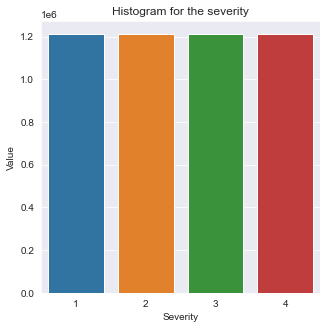

In [382]:
severity_counts = df_merged["Severity"].value_counts()

plt.figure(figsize=(5,5))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [ ]:
#save the unbalanced and normalized data 

In [488]:
df_merged.to_csv("data_balanced.csv",index=True, index_label=None)

# Clustering 

Next, Perform Kmeans clustering (for this problem, use the Kmeans implementation in scikit-learn) on the image data (since there are a total 7 pre-assigned image classes, you should use K = 7 in your clustering). Use Euclidean distance as your distance measure for the clustering. Print the cluster centroids (use some formatting so that they are visually understandable). Compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.

In [2]:
from sklearn.cluster import KMeans 

In [5]:
df_balanced = pd.read_csv("//Users/wanshuwang/Documents/CSDS/DS/DSC478/FinalProject/data_balanced.csv")

In [34]:
df_balanced = df_balanced.drop(df_balanced.columns[0], axis = 1) 

In [35]:
df_balanced.head(10)

Distance(mi)  Temperature(F)  Humidity(%)  Pressure(in)  \
0                0.02            0.51         0.58          0.51   
1                0.00            0.48         0.91          0.51   
2                0.00            0.48         0.97          0.51   
3                0.00            0.48         0.97          0.51   
4                0.00            0.49         0.55          0.51   
...               ...             ...          ...           ...   
4849523          0.03            0.43         0.83          0.51   
4849524          0.00            0.52         0.70          0.52   
4849525          0.01            0.50         0.84          0.50   
4849526          0.00            0.47         0.63          0.50   
4849527          0.04            0.55         0.96          0.51   

         Visibility(mi)  Wind_Speed(mph)  Amenity  Bump  Crossing  Give_Way  \
0                  0.07             0.01     0.00  0.00      0.00      0.00   
1                  0.07             0.01     0.00  0.00      0.00      0.00   
2                  0.07             0.01     0.00  0.00      0.00      0.00   
3                  0.07             0.01     0.00  0.00      0.00      0.00   
4                  0.07             0.01     0.00  0.00      0.00      0.00   
...                 ...              ...      ...   ...       ...       ...   
4849523            0.07             0.01     0.00  0.00      0.00      0.00   
4849524            0.07             0.01     0.00  0.00      0.00      0.00   
4849525            0.07             0.00     0.00  0.00      0.00      0.00   
4849526            0.07             0.01     0.00  0.00      0.00      0.00   
4849527            0.07             0.00     0.00  0.00      0.00      0.00   

         ...  Weather_Condition_Fog  Weather_Condition_Hail  \
0        ...                   0.00                    0.00   
1        ...                   0.00                    0.00   
2        ...                   0.00                    0.00   
3        ...                   0.00                    0.00   
4        ...                   0.00                    0.00   
...      ...                    ...                     ...   
4849523  ...                   0.00                    0.00   
4849524  ...                   0.00                    0.00   
4849525  ...                   0.00                    0.00   
4849526  ...                   0.00                    0.00   
4849527  ...                   0.00                    0.00   

         Weather_Condition_Rain  Weather_Condition_Sand  \
0                          1.00                    0.00   
1                          1.00                    0.00   
2                          0.00                    0.00   
3                          0.00                    0.00   
4                          0.00                    0.00   
...                         ...                     ...   
4849523                    0.00                    0.00   
4849524                    0.00                    0.00   
4849525                    0.00                    0.00   
4849526                    0.00                    0.00   
4849527                    0.00                    0.00   

         Weather_Condition_Smoke  Weather_Condition_Snow  \
0                           0.00                    0.00   
1                           0.00                    0.00   
2                           0.00                    0.00   
3                           0.00                    0.00   
4                           0.00                    0.00   
...                          ...                     ...   
4849523                     0.00                    0.00   
4849524                     0.00                    0.00   
4849525                     0.00                    0.00   
4849526                     0.00                    0.00   
4849527                     0.00                    0.00   

         Weather_Condition_Thunderstorm  Weather_Conditi

In [36]:
#df_balanced = df_merged
array_features = df_balanced.drop(columns = "Severity").to_numpy()

In [38]:
array_features.shape

(4849528, 53)

In [39]:
kmeans = KMeans(n_clusters=4, max_iter=500, verbose=1) # initialization

In [40]:
kmeans.fit(array_features)

Initialization complete
Iteration 0, inertia 13998392.716053737
Iteration 1, inertia 8237693.085309253
Iteration 2, inertia 7894562.3101486815
Iteration 3, inertia 7870776.167758462
Iteration 4, inertia 7861010.669993157
Iteration 5, inertia 7856536.772671938
Iteration 6, inertia 7853585.558054533
Iteration 7, inertia 7853269.65532054
Iteration 8, inertia 7853191.518050598
Iteration 9, inertia 7853183.920118807
Converged at iteration 9: center shift 9.846544735182008e-07 within tolerance 4.293104370410066e-06.
Initialization complete
Iteration 0, inertia 14015829.112066915
Iteration 1, inertia 8421478.945543144
Iteration 2, inertia 8185389.802621426
Iteration 3, inertia 8116104.4619842125
Iteration 4, inertia 8057681.032344734
Iteration 5, inertia 8035853.650862207
Iteration 6, inertia 7996514.590026722
Iteration 7, inertia 7934054.193101714
Iteration 8, inertia 7928137.125854571
Converged at iteration 8: center shift 5.310289355984782e-10 within tolerance 4.293104370410066e-06.
Initia

KMeans(max_iter=500, n_clusters=4, verbose=1)

In [41]:
clusters = kmeans.predict(array_features)
clusters

array([1, 1, 2, ..., 2, 2, 3], dtype=int32)

In [42]:
y = df_balanced.Severity.to_numpy()
y

array([3, 2, 2, ..., 4, 4, 4])

In [43]:
clusters_df = pd.DataFrame(clusters, columns=["Severity"])
clusters_df.head(10)

Severity
0         1
1         1
2         2
3         2
4         2
5         1
6         2
7         2
8         2
9         1

The centroids provide an aggregate representation and a characterization of each cluster.

In [44]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids

0    1    2    3    4    5    6    7    8    9   ...   43   44   45    46  \
0 0.00 0.62 0.43 0.50 0.07 0.01 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00 -0.00   
1 0.01 0.55 0.82 0.51 0.04 0.01 0.00 0.00 0.00 0.00  ... 0.00 0.12 0.00  0.57   
2 0.00 0.58 0.65 0.51 0.07 0.01 0.00 0.00 0.00 0.00  ... 1.00 0.00 0.00 -0.00   
3 0.01 0.56 0.66 0.51 0.07 0.01 0.00 0.00 0.00 0.00  ... 0.00 0.02 0.00 -0.00   

    47   48   49    50    51    52  
0 0.00 0.00 0.00 -0.00 -0.00  0.00  
1 0.00 0.01 0.14  0.07  0.00  0.09  
2 0.00 0.00 0.00  0.00 -0.00  0.00  
3 0.00 0.00 0.00  0.00 -0.00 -0.00  

[4 rows x 53 columns]

In [14]:
#Homogeneity: each cluster contains only members of a single class. Completeness: all members of a given class are assigned to the same cluster.
from sklearn.metrics import completeness_score, homogeneity_score


In [45]:
print("completeness score:", completeness_score(y,clusters))

completeness score: 0.01474845550687712


In [46]:
print("homogeneity score:", homogeneity_score(y,clusters))

homogeneity score: 0.013482016769888854


# PCA

Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Then use these r components as features to transform the data into a reduced dimension space.

In [47]:
# First step is to obtain the covariance matrix:
meanVals = np.mean(array_features, axis=0)
meanRemoved = array_features - meanVals #remove mean
covMat = np.cov(meanRemoved, rowvar=0)

np.set_printoptions(precision=2,suppress=True,linewidth=100)
print(covMat)

[[ 0.   -0.    0.   ...  0.   -0.   -0.  ]
 [-0.    0.   -0.01 ...  0.    0.    0.  ]
 [ 0.   -0.01  0.06 ...  0.    0.   -0.  ]
 ...
 [ 0.    0.    0.   ...  0.01 -0.   -0.  ]
 [-0.    0.    0.   ... -0.    0.   -0.  ]
 [-0.    0.   -0.   ... -0.   -0.    0.01]]


In [51]:
import numpy.linalg as la
eigVals,eigVects = la.eig(np.mat(covMat))

In [52]:
print(eigVals)

[ 0.44  0.25  0.13  0.12  0.12  0.09  0.08  0.08  0.07  0.07  0.06  0.06  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.04  0.02  0.04  0.03  0.04  0.03  0.03  0.03  0.03  0.01  0.01  0.    0.
  0.    0.    0.    0.    0.    0.    0.   -0.   -0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.  ]


In [53]:
print(eigVects)

[[-0.    0.   -0.   ...  0.    0.    0.  ]
 [ 0.01 -0.06 -0.01 ...  0.    0.    0.  ]
 [-0.11  0.23 -0.04 ...  0.    0.    0.  ]
 ...
 [-0.   -0.    0.01 ...  0.    0.    0.  ]
 [-0.   -0.   -0.   ...  0.    0.    0.  ]
 [ 0.   -0.01  0.02 ...  0.    0.    0.  ]]


In [54]:
eigValInd = np.argsort(eigVals)  #sort, sort goes smallest to largest
eigValInd = eigValInd[::-1]   #reverse
sortedEigVals = eigVals[eigValInd]
print(sortedEigVals)
total = sum(sortedEigVals)
varPercentage = sortedEigVals/total*100
print(varPercentage)

[ 0.44  0.25  0.13  0.12  0.12  0.09  0.08  0.08  0.07  0.07  0.06  0.06  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.04  0.04  0.04  0.03  0.03  0.03  0.03  0.03  0.02  0.01  0.01  0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.   -0.   -0.  ]
[19.5  11.04  5.83  5.48  5.3   3.94  3.61  3.48  3.27  3.2   2.83  2.68  2.38  2.35  2.31  2.28
  2.23  2.12  1.99  1.9   1.7   1.58  1.48  1.45  1.41  1.39  1.28  0.79  0.56  0.41  0.14  0.08
  0.01  0.01  0.01  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.   -0.   -0.  ]


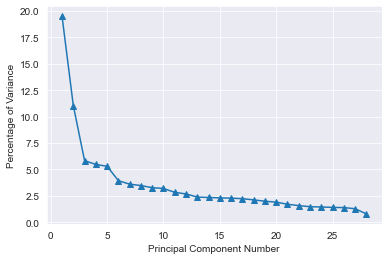

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 29), varPercentage[:28], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [76]:
sum(varPercentage[:25])

95.32851087304965

In [78]:
#r = 8 of PCs needed to capture at least 95% of variance in the data
topNfeat = 25
topEigValInd = eigValInd[:topNfeat]  #cut off unwanted dimensions
reducedEigVects = eigVects[:,topEigValInd]   #reorganize eig vects largest to smallest
reducedDT = np.dot(meanRemoved, reducedEigVects)    #transform data into new dimensions
print(reducedDT)
reducedDT.shape

[[-0.03  0.58  0.26 ... -0.2   0.52 -0.21]
 [ 0.01  0.98 -0.54 ... -0.12  0.38 -0.17]
 [-0.68  0.99 -0.76 ... -0.    0.03 -0.01]
 ...
 [-0.66  0.15 -1.   ... -0.01 -0.02  0.01]
 [-0.69 -0.28 -0.03 ... -0.04 -0.06  0.05]
 [ 0.79  1.01 -0.39 ...  0.02 -0.06  0.03]]


(4849528, 25)

Perform Kmeans again, but this time on the lower dimensional transformed data. Then, compute the Completeness and Homogeneity values of the new clusters.

In [79]:
kmeans_reduced = KMeans(n_clusters=4, max_iter=500, verbose=1) # initialization

In [80]:
kmeans_reduced.fit(reducedDT)

Initialization complete
Iteration 0, inertia 12526910.278466763
Iteration 1, inertia 8129658.038064705
Iteration 2, inertia 7963424.653430543
Iteration 3, inertia 7863228.886235151
Iteration 4, inertia 7767164.292427566
Iteration 5, inertia 7646148.627779742
Iteration 6, inertia 7546422.347063777
Iteration 7, inertia 7529609.056050161
Iteration 8, inertia 7500749.1559508145
Iteration 9, inertia 7437008.9371438725
Iteration 10, inertia 7413786.472467885
Iteration 11, inertia 7413778.169669917
Converged at iteration 11: center shift 4.798177202786193e-12 within tolerance 8.676211229029354e-06.
Initialization complete
Iteration 0, inertia 13205356.322436959
Iteration 1, inertia 7722891.842065392
Iteration 2, inertia 7462362.966793786
Iteration 3, inertia 7422248.112712712
Iteration 4, inertia 7404888.619455097
Iteration 5, inertia 7401962.942734625
Iteration 6, inertia 7401357.617027549
Converged at iteration 6: center shift 5.397090744012483e-06 within tolerance 8.676211229029354e-06.
In

KMeans(max_iter=500, n_clusters=4, verbose=1)

In [81]:
clusters_reduced = kmeans_reduced.predict(reducedDT)

In [82]:
pd.DataFrame(clusters_reduced, columns=["Severity"])

Severity
0               2
1               2
2               1
3               1
4               1
...           ...
4849523         3
4849524         1
4849525         1
4849526         1
4849527         3

[4849528 rows x 1 columns]

In [83]:
#Homogeneity: each cluster contains only members of a single class. Completeness: all members of a given class are assigned to the same cluster.
from sklearn.metrics import completeness_score, homogeneity_score
print(completeness_score(y,clusters_reduced))
# compare to the previous completeness score : 0.01474845550687712
# It has improved.

0.014798401142677924


In [84]:
print(homogeneity_score(y,clusters_reduced))
# compare to the previous homogeneity score: 0.013482016769888854
# It has improved.

0.01352069029332516


Discussion

We used  K-Means with four clusters for clustering to group the balanced dataset and compared the groups with the original groups with different severity levels. We used PCA for reducing features. The following are the results for clustering before PCA and after PCA. The completeness score after PCA is 0.014798401142677924, compare to the previous completeness score: 0.01474845550687712, which has improved. The homogeneity score is ​​0.01352069029332516, compare to the previous homogeneity score: 0.013482016769888854, it has improved. The clustering didn't perform very well. It is with bad completeness and homogeneity. After PCA, it had improved very slightly. 

​​From our previous study, we know there is an important feature: source, which means who is responsible to record this accident record. The record source means that severity reported by different sources may differ in their underlying impact on traffic. This updated dataset in this project has been edited by removing many features including source because of some requests of the departments. Considering all these above, we may research further for the appropriate type for the accidents.


Acknowledgements

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.